#  Seismic Data Analysis

### What is Seismic Hazard Analysis? 


In general terms, the seismic hazard defines the expected seismic ground motion at a site, phenomenon which may result in destructions and losses.

Тwo major approaches – deterministic and probabilistic – are worldwide used at present for seismic hazard assessment.

The deterministic approach takes into account a single, particular earthquake, the event that is expected to produce the strongest level of shaking at the site.

The outputs – macroseismic intensity, peak ground acceleration, peak ground velocity, peak ground displacement, response spectra – may be used directly in engineering applications.

In the probabilistic approach, initiated with the pioneering work of Cornell, the seismic hazard is estimated in terms of a ground motion parameter – macroseismic intensity, peak ground acceleration – and its annual probability of exceedance (or return period) at a site.

The method yields regional seismic probability maps, displaying contours of maximum ground motion (macroseismic intensity, PGA) of equal – specified – return period.


Source : http://www.infp.ro/en/seismic-hazard/

### Dataset :

* Name- seismic-bumps Data Set 

* Abstract: The data describe the problem of high energy (higher than 10^4 J) seismic bumps forecasting in a coal mine. Data come from two of longwalls located in a Polish coal mine.

* Source : https://archive.ics.uci.edu/ml/datasets/seismic-bumps

*** Dataset Information ***

Mining activity was and is always connected with the occurrence of dangers which are commonly called 
mining hazards. A special case of such threat is a seismic hazard which frequently occurs in many 
underground mines. Seismic hazard is the hardest detectable and predictable of natural hazards and in 
this respect it is comparable to an earthquake. More and more advanced seismic and seismoacoustic 
monitoring systems allow a better understanding rock mass processes and definition of seismic hazard 
prediction methods. Accuracy of so far created methods is however far from perfect. Complexity of 
seismic processes and big disproportion between the number of low-energy seismic events and the number 
of high-energy phenomena (e.g. > 10^4J) causes the statistical techniques to be insufficient to predict 
seismic hazard. 




The task of seismic prediction can be defined in different ways, but the main 
aim of all seismic hazard assessment methods is to predict (with given precision relating to time and 
date) of increased seismic activity which can cause a rockburst. In the data set each row contains a 
summary statement about seismic activity in the rock mass within one shift (8 hours). If decision 
attribute has the value 1, then in the next shift any seismic bump with an energy higher than 10^4 J was 
registered. That task of hazards prediction bases on the relationship between the energy of recorded 
tremors and seismoacoustic activity with the possibility of rockburst occurrence. Hence, such hazard 
prognosis is not connected with accurate rockburst prediction. Moreover, with the information about the 
possibility of hazardous situation occurrence, an appropriate supervision service can reduce a risk of 
rockburst (e.g. by distressing shooting) or withdraw workers from the threatened area. Good prediction 
of increased seismic activity is therefore a matter of great practical importance. The presented data 
set is characterized by unbalanced distribution of positive and negative examples. In the data set there 
are only 170 positive examples representing class 1. 


<img src= "att.jpg">

# Classification Seismic of Hazard in coal mines 

In [1]:
# Dependencies import

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
import pandas as pd
import seaborn as sns;

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import preprocessing

%matplotlib inline

In [3]:
## load data and clean

data = arff.loadarff('data/seismic-bumps.arff')
df = pd.DataFrame(data[0])
df['seismic'] = df['seismic'].str.decode('utf-8')
df['seismoacoustic'] = df['seismoacoustic'].str.decode('utf-8')
df['shift'] = df['shift'].str.decode('utf-8')
df['ghazard'] = df['ghazard'].str.decode('utf-8')
df['class'] = df['class'].str.decode('utf-8')
df['class'] = pd.to_numeric(df['class'])


In [4]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Exploratory Data Analysis

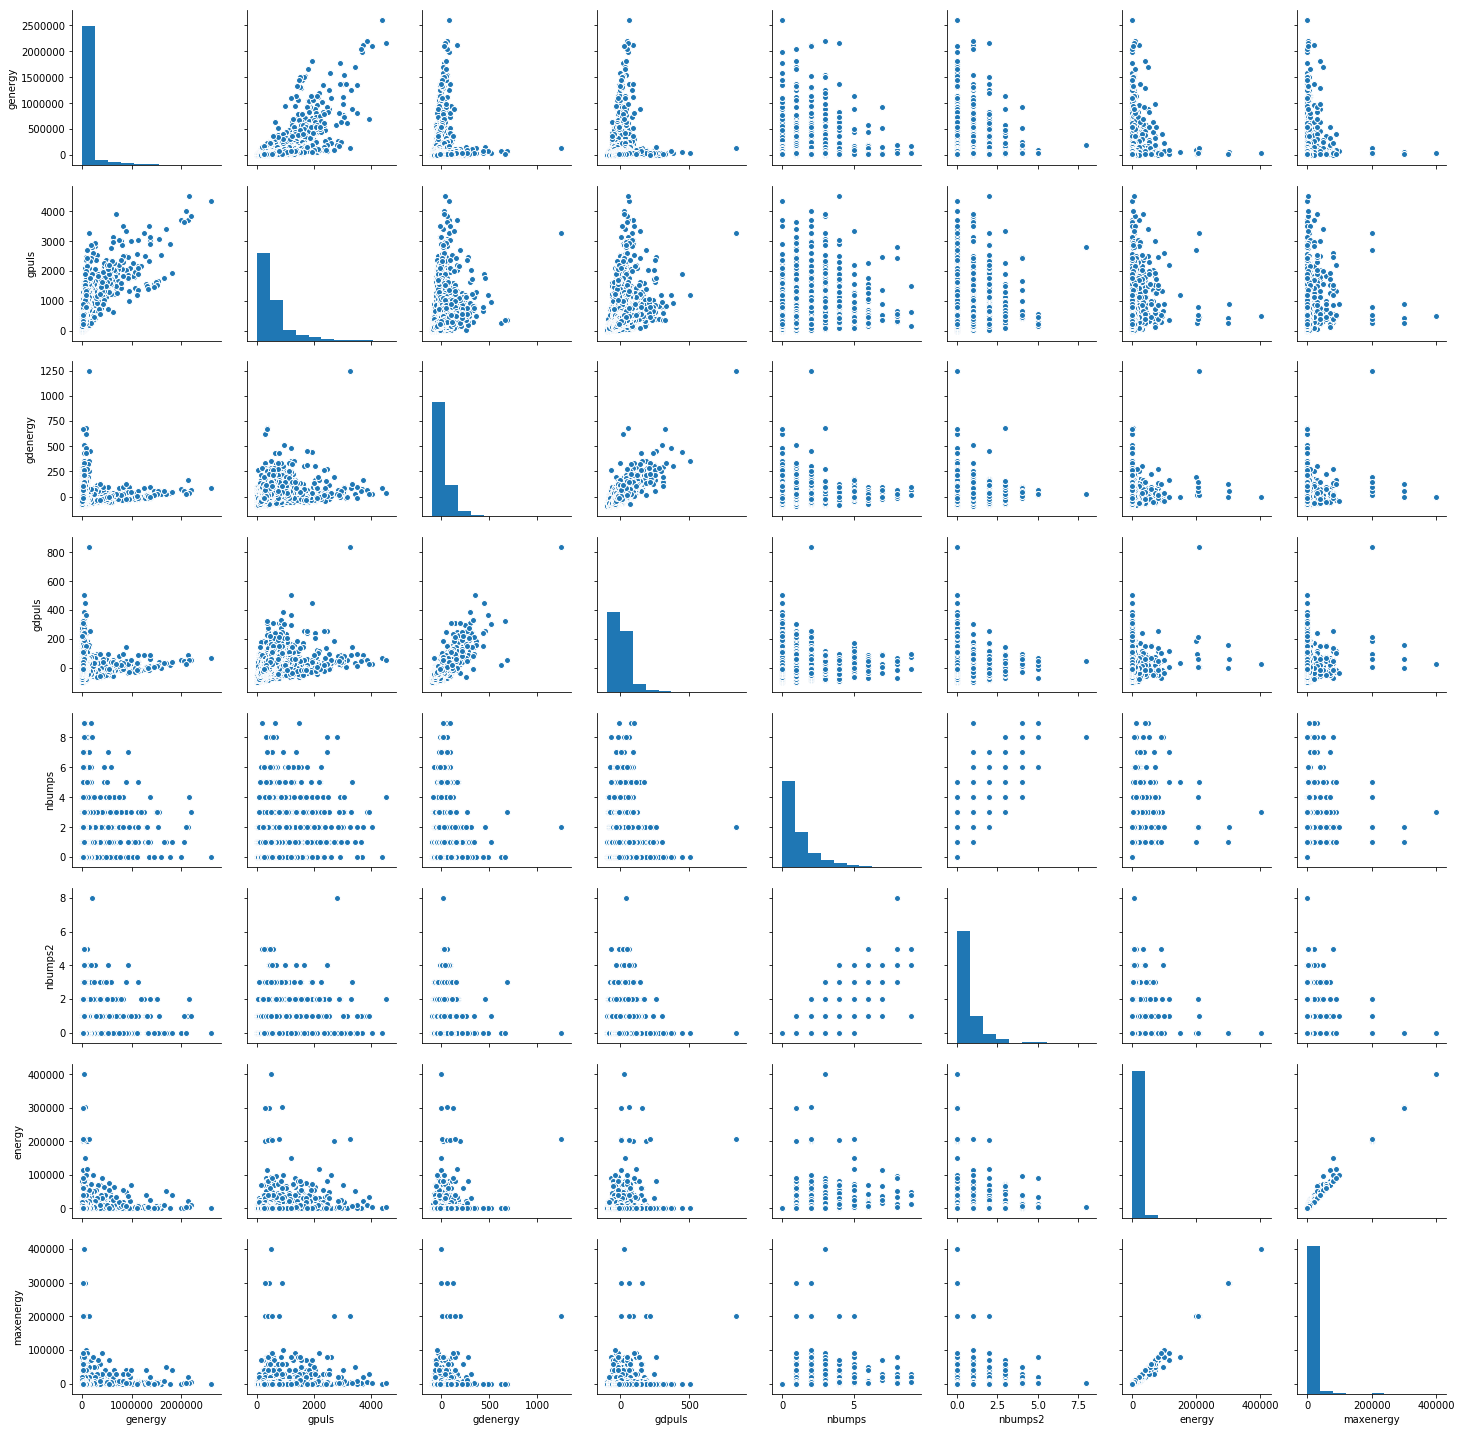

In [5]:
df_plot = df[['genergy', 'gpuls', 'gdenergy', 'gdpuls',
          'nbumps', 'nbumps2',
          'energy', 'maxenergy']].copy()

p = sns.pairplot(df_plot)

The plots above show some colinearity between attributes (e.g. genergy and gpuls, energy and maxenergy). The following will use regularization to mitigate the problem.

# Build models 

In [6]:
data_x = df.loc[:,['shift', 'genergy', 'gpuls', 'gdenergy', 'gdpuls',
               'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
               'nbumps6', 'nbumps7', 'nbumps89', 
               'energy', 'maxenergy']]

# true response
data_y = df.loc[:,['class']]

# responses from seismic theories
data_y1 = df.loc[:, ['seismic']]
data_y2 = df.loc[:, ['seismoacoustic']]
data_y3 = df.loc[:, ['ghazard']]


Le = preprocessing.LabelEncoder()
Le.fit(['a', 'b', 'c', 'd'])
data_y1['seismic'] = Le.transform(data_y1['seismic'])
data_y2['seismoacoustic'] = Le.transform(data_y2['seismoacoustic'])
data_y3['ghazard'] = Le.transform(data_y3['ghazard'])

Le2 = preprocessing.LabelEncoder()
Le2.fit(['W', 'N'])
data_x['shift'] = Le2.transform(data_x['shift'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [15]:
X_train.describe()

,shift,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2067.000000,2.067000e+03,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.0,2067.0,2067.0,2067.000000,2067.000000
mean,0.641026,8.607308e+04,535.594582,13.300919,5.313014,0.863570,0.392840,0.398162,0.066763,0.005322,0.0,0.0,0.0,5098.863087,4389.671021
std,0.479816,2.171811e+05,560.135167,82.343191,64.092603,1.367144,0.786815,0.769491,0.277231,0.072773,0.0,0.0,0.0,21062.587435,19957.197931
min,0.000000,2.900000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,1.173500e+04,192.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,1.000000,2.585000e+04,376.000000,-5.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,1.000000,5.201000e+04,661.000000,40.000000,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2800.000000,2000.000000
max,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 25 to 860
Data columns (total 15 columns):
shift        2067 non-null int64
genergy      2067 non-null float64
gpuls        2067 non-null float64
gdenergy     2067 non-null float64
gdpuls       2067 non-null float64
nbumps       2067 non-null float64
nbumps2      2067 non-null float64
nbumps3      2067 non-null float64
nbumps4      2067 non-null float64
nbumps5      2067 non-null float64
nbumps6      2067 non-null float64
nbumps7      2067 non-null float64
nbumps89     2067 non-null float64
energy       2067 non-null float64
maxenergy    2067 non-null float64
dtypes: float64(14), int64(1)
memory usage: 258.4 KB


#### Let'sfind the best regularization coefficient

In [18]:
## use ROC as the score

C = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2]
scores = []

for c in C:
    logist = LogisticRegression(penalty='l1', C=c, max_iter=500)
    logist.fit(X_train, y_train.values.ravel())
    scores.append(roc_auc_score(y_train['class'].values, logist.predict(X_train)))

C_best = C[scores.index(max(scores))]
print("Best C: ", C_best)

Best C:  0.1


## Using Logistic Regression

In [20]:
clf = LogisticRegression(penalty='l1', C=C_best, max_iter = 500)
clf.fit(X_train, y_train.values.ravel())

roc_train = roc_auc_score(y_train['class'].values, clf.predict(X_train))
# print("training score: %.4f" % clf.score(Xtrain, ytrain))
print("training score: %.4f" % roc_train)
# print("test score: ", clf.score(Xtest, ytest))
roc_test = roc_auc_score(y_test['class'].values, clf.predict(X_test))
print("test score: %.4f" % roc_test)
print("n_iter: ", clf.n_iter_)

training score: 0.5100
test score: 0.5000
n_iter:  [27]


In [21]:
clf.coef_

array([[ 0.00000000e+00, -7.26807605e-07,  9.39616012e-04,
        -1.14791632e-03, -1.81496079e-03,  3.34752877e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.16154406e-05,  1.71355287e-05]])

In [24]:
ind = y_test.index.values

# get the responses from the seismic, seismoacoustic and ghazard methods
# that correspond to indices in ytest
yseismic = data_y1.loc[ind, ['seismic']]
yseismoacoustic = data_y2.loc[ind, ['seismoacoustic']]
yghazard = data_y3.loc[ind, ['ghazard']]

Responses as probabilies from the logit model

In [26]:
yprob = clf.predict_proba(X_test)

yprob

array([[0.96265003, 0.03734997],
       [0.85742853, 0.14257147],
       [0.95873561, 0.04126439],
       ...,
       [0.96182863, 0.03817137],
       [0.95907563, 0.04092437],
       [0.87125846, 0.12874154]])

Threshold

In [27]:
ypred = yprob[:,1] > 0.2  # threshold

From the plot below, to use the probabilites from the prediction, we need to set a threshold to determine if the response should be hazardous or not. The hard labels from the prediction will be mostly 0's.

Note: setting the threshold requires further study. One way is to tune the threshold in training sets and test the performance in test sets.

Text(0.5,1,'Raw results from prediction')

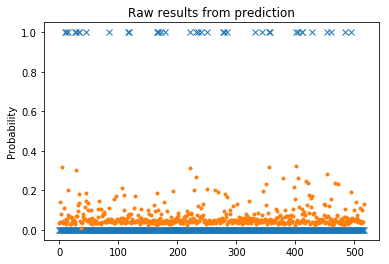

In [28]:

plt.plot([i for i in range(len(y_test))], y_test, 'x', yprob[:,1], '.')
plt.ylabel('Probability')
plt.title('Raw results from prediction')

Text(0.5,1,'Probabilities after cut-off')

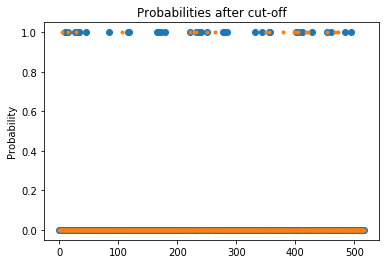

In [29]:
plt.plot([i for i in range(len(y_test))], y_test, 'o', ypred, '.')
plt.ylabel('Probability')
plt.title('Probabilities after cut-off')

### Results

In [30]:
dy = { 'logit': pd.Series(ypred) }
dfy = pd.DataFrame(dy)
frames = [dfy, yseismic.reset_index(drop=True),
          yseismoacoustic.reset_index(drop=True),
          yghazard.reset_index(drop=True)]

# build the responses data frame (each column is responses from one method)
df_result = pd.concat(frames, axis = 1)
df_result = df_result*1  # convert bool to int

In [31]:
df_result

,logit,seismic,seismoacoustic,ghazard
0,0,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
5,1,1,1,0
6,0,0,0,0
7,0,1,1,0
8,0,1,1,0
9,0,0,0,0


In [32]:
yvote = (df_result == 0).sum(axis=1)  # number of zeros on each row
yvote = (yvote <= 2)*1

# final results based on the vote from each of the four methods
# 0 means no/low hazard, 1 means hazardous
# if tie, assume response is 1 (hazardous)
df_result['ensemble'] = yvote.values
df_result['true'] = y_test.values
df_result.head(20)

,logit,seismic,seismoacoustic,ghazard,ensemble,true
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0
5,1,1,1,0,1,0
6,0,0,0,0,0,0
7,0,1,1,0,1,0
8,0,1,1,0,1,0
9,0,0,0,0,0,0


In [33]:
# score from the ensemble method with logit regression
roc_auc_score(y_test['class'].values, df_result['ensemble'].values)

0.574634009009009

In [35]:

## compare to the three methods already in the dataset

frames = [yseismic.reset_index(drop=True),
          yseismoacoustic.reset_index(drop=True),
          yghazard.reset_index(drop=True)]
df_result0 = pd.concat(frames, axis = 1)
df_result0 = df_result0*1

yvote0 = (df_result0 == 0).sum(axis=1)
yvote0 = (yvote0 <= 2)*1
df_result0['ensemble'] = yvote0.values
df_result0['true'] = y_test.values
df_result0.head(20)

,seismic,seismoacoustic,ghazard,ensemble,true
0,0,0,0,0,0
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,0,0,0
5,1,1,0,1,0
6,0,0,0,0,0
7,1,1,0,1,0
8,1,1,0,1,0
9,0,0,0,0,0


In [36]:
# score from the ensemble of the three methods in the original dataset
roc_auc_score(y_test['class'].values, df_result0['ensemble'].values)

0.5378659909909911

In [37]:
# score from the seismic method (no ensemble)
roc_auc_score(y_test['class'].values, yseismic['seismic'].values)

0.5609515765765766

In [38]:
# score from the seismoacoustic method (no ensemble)
roc_auc_score(y_test['class'].values, yseismoacoustic['seismoacoustic'].values)

0.5041385135135136